In [10]:
%run my_functions.ipynb

## SAT Problem 3

#### F(x1,x2,x3) = (x1 v ~x2) & (x2 v x3) & (~x1 v ~x3) & (~x1 v ~x2 v x3)

solution = (x1=0, x2=0, x3=1)

### Using my_functions

3


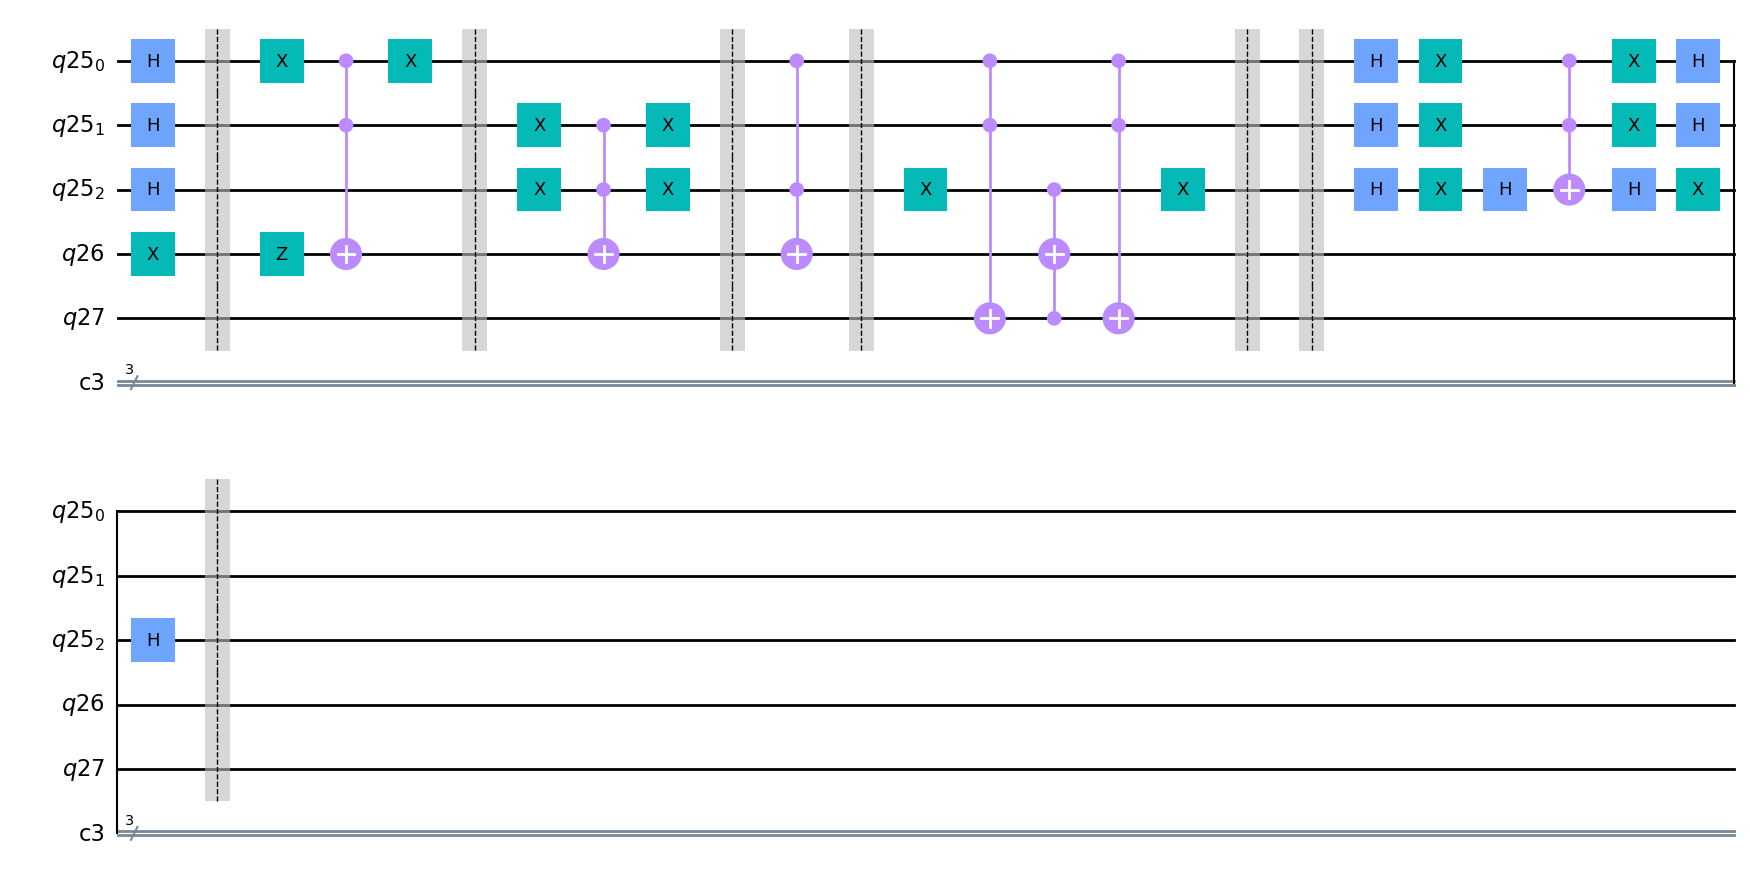

In [11]:
sat_formula = [[1,-2,0],[0,2,3],[-1,0,-3],[-1,-2,3]]
qc = sat3_var3(sat_formula)
qc.draw('mpl')  

In [12]:
result = execute(qc,Aer.get_backend('statevector_simulator')).result().get_statevector()
print(result)

Statevector([ 0.26516504+9.74200563e-17j,  0.26516504+1.29893408e-16j,
              0.26516504+1.29893408e-16j,  0.26516504+1.62366761e-16j,
              0.61871843+2.16489014e-16j,  0.26516504+1.40717859e-16j,
              0.26516504+1.40717859e-16j,  0.26516504+1.51542310e-16j,
              0.08838835+3.24733521e-17j,  0.08838835+4.32978028e-17j,
              0.08838835+4.32978028e-17j,  0.08838835+5.41222535e-17j,
             -0.26516504-8.65956056e-17j,  0.08838835+3.24733521e-17j,
              0.08838835+3.24733521e-17j,  0.08838835+6.49467042e-17j,
              0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
              0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
              0.        -0.00000000e+00j,  0.        -0.00000000e+00j,
              0.        -0.00000000e+00j,  0.        -0.00000000e+00j,
              0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
              0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
      

3


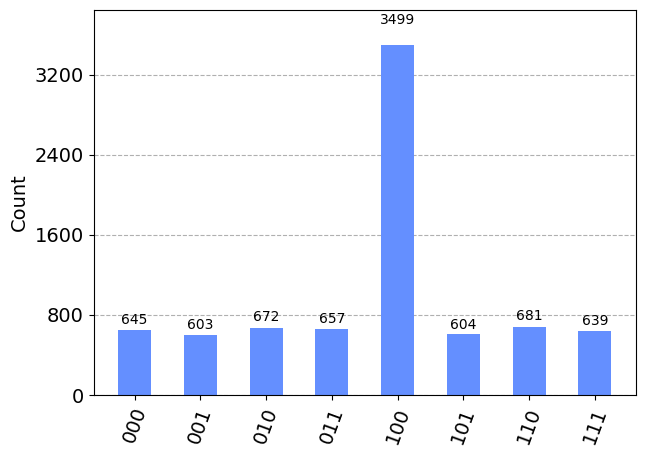

In [20]:
sat_formula = [[1,-2,0],[0,2,3],[-1,0,-3],[-1,-2,3]]
qc = sat3_var3(sat_formula)
result = execute(qc,Aer.get_backend('qasm_simulator'),shots=8000).result().get_counts()
plot_histogram(result)

In [21]:
print(result)

{'101': 604, '110': 681, '111': 639, '011': 657, '100': 3499, '001': 603, '010': 672, '000': 645}


In [14]:
def sat3_var3(sat_formula):
    n = max(len(clause) for clause in sat_formula)
    print(n)
    f_in = QuantumRegister(n)
    f_out = QuantumRegister(1)
    aux = QuantumRegister(n-2)
    cr = ClassicalRegister(n)
    circuit = QuantumCircuit(f_in,f_out,aux,cr)

    #Superposition of input states
    for i in range(n):
        circuit.h(f_in[i])
    # circuit.x(aux[1])
    # circuit.h(aux[1])
    #initializing f_out qubit with state |1>
    circuit.x(f_out[0])
    circuit.barrier()
    circuit.z(f_out[0])
    
    #oracle
    for _ in range(math.floor(np.pi*math.sqrt(2**n)/4 - 0.5)):
        oracle(circuit,f_in,f_out,aux,n,sat_formula)
    
    # circuit.cx(f_out[0],aux[1])
        circuit.barrier()
    #diffusion operator
        diffusion_circ3(circuit,f_in)
    #phase kickback

    circuit.measure(f_in[:],cr[:])
    
    return circuit